# **การเข้าถึงตลาดการเงินสามารถเข้าได้หลายรูปแบบ**
- yfinance
  เป็นแพคเกจ ให้เข้าถึง Yahoo! ข้อมูลตลาดการเงิน
  
  โดย yfinance จะ returns a pandas.DataFrame with multi-level column names
  
  การนำเข้าข้อมูลราคาหุ้นไทยจากเว็บไซต์ https://finance.yahoo.com/ โดยใช้ Yahoo Finance API:(ผ่าน module yfinance)

ข้อจำกัดคือ

> ใช้ผ่าน Public API(ไม่มีการตรวจสอบสิทธิ์) จะถูกจำกัดไว้ที่ 2,000 คำขอต่อชั่วโมงต่อ IP ดังนั้นได้สูงสุด 48,000 คำขอต่อวัน



- pandas-datareader  
ดูเพิ่มเติม https://pydata.github.io/pandas-datareader/index.html
  
  เป็นการ extract data from various Internet sources into a pandas DataFrame.

 เช่น World Bank, FRED, Naver Finance, Yahoo Finance, etc.

 **หมายเหตุ**  อย่างไรก็ตาม เงื่อนไขหรือกฎเกณฑ์ในการดึงข้อมูลเหล่านี้มักมีการเปลี่ยนแปลงไปตามสถานการณ์ปัจจุบัน เมื่อต้องการใช้งานจึงควรศึกษาข้อมูลเพิ่มเติมเพื่อให้โปรแกรมสามารถดำเนินการได้อย่างถูกต้อง

# **การดึงข้อมูลตลาดหุ้นผ่าน yfinance**

เริ่มจากการ install yfinance

In [ ]:
! pip install yfinance

จากนั้น เข้าไปดู ticker ในเว็บไซต์ https://finance.yahoo.com/
แล้วทำการ download ข้อมูลมาเก็บไว้เป็นไฟล์ .csv

ticker เป็นชื่อย่อของหลักทรัพย์ที่ต้องการดูข้อมูล

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina' #กำหนดรูปกราฟเป็นความละเอียดสูง

ตรวจสอบ version ของ pandas และ seaborn

In [ ]:
print(f"pandas version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas version = 2.1.4
seaborn version = 0.13.1


# การอ่านหุ้นด้วยคำสั่ง yf.download

In [ ]:
import yfinance as yf
import datetime

# Define the stock ticker and the date range
ticker = 'AAPL'
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 9, 1)

# Fetch the data directly using yfinance
data = yf.download(ticker, start=start, end=end)

# Display the fetched data
print(data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182610   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855095   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937271   
...                ...         ...         ...         ...         ...   
2023-08-25  177.380005  179.149994  175.820007  178.610001  177.700684   
2023-08-28  180.089996  180.589996  178.550003  180.190002  179.272644   
2023-08-29  179.699997  184.899994  179.500000  184.119995  183.182632   
2023-08-30  184.940002  187.850006  184.740005  187.649994  186.694672   
2023-08-31  187.839996  189.119995  187.479996  187.869995  186.913544   

               Volume  
Date         

In [ ]:
df = yf.download('GE', start='2022-09-10', end='2022-10-09')

[*********************100%***********************]  1 of 1 completed


### การใส่ ticker ของหุ้นในไทย

In [ ]:
stock_name = "CPALL.BK"
data = yf.download(stock_name, start="2021-06-01", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_name = "TRUE.BK"
data_1 = yf.download(stock_name, start="2021-06-01", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data) #พิจารณาข้อมูลที่ download มา

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2021-06-01  61.25  61.25  60.25  60.75  58.474895  27737500
2021-06-02  60.75  61.00  60.00  60.00  57.752983  22425700
2021-06-04  60.00  60.50  60.00  60.00  57.752983  21653900
2021-06-07  60.50  60.75  60.00  60.00  57.752983  11574800
2021-06-08  60.00  60.75  59.75  60.00  57.752983  17748400
...           ...    ...    ...    ...        ...       ...
2023-06-23  61.75  62.00  61.25  61.75  60.689915   8601500
2023-06-26  61.75  62.25  61.50  62.00  60.935623  11173200
2023-06-27  62.00  62.25  61.50  61.50  60.444206  15063100
2023-06-28  61.75  62.25  61.50  61.50  60.444206   9948600
2023-06-29  61.50  61.50  60.75  61.00  59.952789  19305700

[505 rows x 6 columns]


### การกำหนด index และเก็บข้อมูลลงไฟล์

ข้อมูลที่ดาวน์โหลดมาด้วยคำสั่ง yf.download จะมี Date เป็น index

และเขียนลงในไฟล์ .csv และ .xlsx

In [ ]:
data.to_csv("CPALL.csv")
data.to_excel("CPALL.xlsx")

### คำสั่งเพื่อใช้พิจารณารายละเอียดของข้อมูล
พิจารณาข้อมูลที่ได้ผ่านคำสั่งต่างๆ เช่น info, head และ columns ดังนี้

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2021-06-01 to 2023-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       505 non-null    float64
 1   High       505 non-null    float64
 2   Low        505 non-null    float64
 3   Close      505 non-null    float64
 4   Adj Close  505 non-null    float64
 5   Volume     505 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,61.25,61.25,60.25,60.75,58.474895,27737500
2021-06-02,60.75,61.00,60.00,60.00,57.752983,22425700
2021-06-04,60.00,60.50,60.00,60.00,57.752983,21653900
2021-06-07,60.50,60.75,60.00,60.00,57.752983,11574800
2021-06-08,60.00,60.75,59.75,60.00,57.752983,17748400


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

จากนั้นอ่านข้อมูลจากไฟล์ที่เขียนไว้ก่อนหน้า โดยไม่ได้ระบุ index ที่เป็น Date
จะได้ index แบบ implicit

In [ ]:
df1 =   pd.read_csv('CPALL.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-01,61.25,61.25,60.25,60.75,58.474895,27737500
1,2021-06-02,60.75,61.00,60.00,60.00,57.752983,22425700
2,2021-06-04,60.00,60.50,60.00,60.00,57.752983,21653900
3,2021-06-07,60.50,60.75,60.00,60.00,57.752983,11574800
4,2021-06-08,60.00,60.75,59.75,60.00,57.752983,17748400
...,...,...,...,...,...,...,...
500,2023-06-23,61.75,62.00,61.25,61.75,60.689915,8601500
501,2023-06-26,61.75,62.25,61.50,62.00,60.935623,11173200
502,2023-06-27,62.00,62.25,61.50,61.50,60.444206,15063100
503,2023-06-28,61.75,62.25,61.50,61.50,60.444206,9948600


ทำการระบุ index เพื่อให้ข้อมูลเป็นแบบ Time series

In [ ]:
df = pd.read_csv('CPALL.csv', parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,61.25,61.25,60.25,60.75,58.474895,27737500
2021-06-02,60.75,61.00,60.00,60.00,57.752983,22425700
2021-06-04,60.00,60.50,60.00,60.00,57.752983,21653900
2021-06-07,60.50,60.75,60.00,60.00,57.752983,11574800
2021-06-08,60.00,60.75,59.75,60.00,57.752983,17748400
...,...,...,...,...,...,...
2023-06-23,61.75,62.00,61.25,61.75,60.689915,8601500
2023-06-26,61.75,62.25,61.50,62.00,60.935623,11173200
2023-06-27,62.00,62.25,61.50,61.50,60.444206,15063100


การระบุข้อมูล index ให้เป็น Time Series สามารถทำโดยใช้คำสั่ง set_index


ด้วยการกำหนด column Date ให้เป็น index กรณีต้องการยกเลิก index ใช้คำสั่ง reset_index()

In [ ]:
df2 = df1.set_index("Date")
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,61.25,61.25,60.25,60.75,58.474895,27737500
2021-06-02,60.75,61.00,60.00,60.00,57.752983,22425700
2021-06-04,60.00,60.50,60.00,60.00,57.752983,21653900
2021-06-07,60.50,60.75,60.00,60.00,57.752983,11574800
2021-06-08,60.00,60.75,59.75,60.00,57.752983,17748400
...,...,...,...,...,...,...
2023-06-23,61.75,62.00,61.25,61.75,60.689915,8601500
2023-06-26,61.75,62.25,61.50,62.00,60.935623,11173200
2023-06-27,62.00,62.25,61.50,61.50,60.444206,15063100


## การอ่านข้อมูลหุ้นผ่านคำสั่ง  yf.Ticker

In [ ]:
ktb = yf.Ticker("KTB.BK")
hist = ktb.history(start="2023-01-01", end="2023-05-30")
#หากต้องการดึงข้อมูลย้อนหลัง 5 วัน ใช้ parameter period
#ตัวอย่างคำสั่ง hist = scb.history(period="5d")
print(hist) #กรณีนี้จำนวน columnsที่ได้และรูปแบบของ index จะแตกต่างกับ yf.download

                                Open       High        Low      Close  \
Date                                                                    
2023-01-03 00:00:00+07:00  16.139195  16.321558  16.048013  16.230375   
2023-01-04 00:00:00+07:00  16.139196  16.230376  16.048014  16.048014   
2023-01-05 00:00:00+07:00  16.230375  16.595104  16.139194  16.503922   
2023-01-06 00:00:00+07:00  16.595105  16.686285  16.503922  16.686285   
2023-01-09 00:00:00+07:00  16.686285  16.777467  16.412740  16.686285   
...                              ...        ...        ...        ...   
2023-05-23 00:00:00+07:00  17.750785  18.320328  17.750785  18.320328   
2023-05-24 00:00:00+07:00  18.225405  18.320327  18.130480  18.225405   
2023-05-25 00:00:00+07:00  18.225405  18.320328  18.035557  18.320328   
2023-05-26 00:00:00+07:00  18.225404  18.320327  18.130480  18.130480   
2023-05-29 00:00:00+07:00  18.225405  18.320327  18.130480  18.225405   

                              Volume  Dividends  S

In [ ]:
#history จะมีช่วงคือ ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
hist = ktb.history(period="5d")
print(hist)

                                Open       High        Low      Close  \
Date                                                                    
2024-08-30 00:00:00+07:00  18.600000  18.700001  18.299999  18.299999   
2024-09-02 00:00:00+07:00  18.299999  18.299999  18.299999  18.299999   
2024-09-05 00:00:00+07:00  18.900000  19.400000  18.900000  19.299999   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-08-30 00:00:00+07:00   54265600        0.0           0.0  
2024-09-02 00:00:00+07:00          0        0.0           0.0  
2024-09-05 00:00:00+07:00  115739800        0.0           0.0  


ปรับแก้ไข index จาก datetime ให้เป็น date

In [ ]:
hist.reset_index(inplace = True)
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-08-30 00:00:00+07:00,18.600000,18.700001,18.299999,18.299999,54265600,0.0,0.0
1,2024-09-02 00:00:00+07:00,18.299999,18.299999,18.299999,18.299999,0,0.0,0.0
2,2024-09-05 00:00:00+07:00,18.900000,19.400000,18.900000,19.299999,115739800,0.0,0.0


In [ ]:
hist['Date'] = pd.to_datetime(hist['Date']).dt.date
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-08-30,18.600000,18.700001,18.299999,18.299999,54265600,0.0,0.0
1,2024-09-02,18.299999,18.299999,18.299999,18.299999,0,0.0,0.0
2,2024-09-05,18.900000,19.400000,18.900000,19.299999,115739800,0.0,0.0


In [ ]:
hist.set_index('Date', inplace = True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-30,18.600000,18.700001,18.299999,18.299999,54265600,0.0,0.0
2024-09-02,18.299999,18.299999,18.299999,18.299999,0,0.0,0.0
2024-09-05,18.900000,19.400000,18.900000,19.299999,115739800,0.0,0.0


แต่ได้ Data มาแล้ว อย่าลืมเช็ค
มีราคาอยู่หลายแบบ จะเลือกใช้อย่างไร?

* ส่วนมากใช้ราคาปิด
* วันของตลาดหุ้นอาจรวมวันหยุด หรือไม่รวม
* ข้อมูลขาดๆหายๆ ไม่เท่ากันในแต่ละเดือน


In [ ]:
df.Close

,Close
Date,
2021-06-01,60.75
2021-06-02,60.00
2021-06-04,60.00
2021-06-07,60.00
2021-06-08,60.00
...,...
2023-06-23,61.75
2023-06-26,62.00
2023-06-27,61.50


# สรุปรูปแบบการดึงข้อมูลด้วย yfinance แบบต่างๆ

1.   Fetching Historical Data

The download method is your go-to for obtaining historical data for any stock.
2.   Ticker Object

The Ticker class allows you to access various data for a specific stock.
3.   Getting Recent Data

Want data for the most recent trading days?
4.   Fetching Data for Multiple Tickers

Retrieve data for multiple stocks in one go.
5.   Adjusted Data Retrieval

Obtain adjusted data, which accounts for stock splits, dividends, etc.
6. Interval-based Data Retrieval

Retrieve data based on specific intervals, like daily or weekly.
7.  Retrieving Dividends and Splits

Access dividend and stock split history.
8.  Real-time Data

Fetch the most up-to-date stock price.
9.   Data for Specific Dates

Obtain data for a specific date range.
10.   Visualization with yfinance

Visualize historical data with ease.



In [ ]:
#1.
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2021-01-01")
print(data.head())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876106  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167610  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742676  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400558  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565193  132079200


In [ ]:
#2.
import yfinance as yf

data = yf.download("AAPL", start="2022-01-01", end="2023-01-01")
print(data.head())

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.273605   
2022-01-04  182.630005  182.940002  179.119995  179.699997  176.998367   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.290192   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.414108   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.581558   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [ ]:
#3.
recent_data = yf.download("AAPL", period="5d")
print(recent_data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-08-30  230.190002  230.399994  227.479996  229.000000  229.000000   
2024-09-03  228.550003  229.000000  221.169998  222.770004  222.770004   
2024-09-04  221.660004  221.779999  217.479996  220.850006  220.850006   
2024-09-05  221.630005  225.479996  221.520004  222.380005  222.380005   
2024-09-06  223.949997  225.240005  219.770004  220.820007  220.820007   

              Volume  
Date                  
2024-08-30  52990800  
2024-09-03  50042900  
2024-09-04  43840200  
2024-09-05  36615400  
2024-09-06  48388600  


In [ ]:
#4.
multi_data = yf.download(["AAPL", "MSFT"], start="2022-01-01", end="2023-01-01")
print(multi_data)

[*********************100%***********************]  2 of 2 completed

Price                       Adj Close                   Close              \
Ticker                           AAPL        MSFT        AAPL        MSFT   
Date                                                                        
2022-01-03 00:00:00+00:00  179.273605  326.940826  182.009995  334.750000   
2022-01-04 00:00:00+00:00  176.998367  321.334747  179.699997  329.010010   
2022-01-05 00:00:00+00:00  172.290192  308.999359  174.919998  316.380005   
2022-01-06 00:00:00+00:00  169.414108  306.557678  172.000000  313.880005   
2022-01-07 00:00:00+00:00  169.581558  306.713959  172.169998  314.040009   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00+00:00  130.631363  235.345551  131.860001  238.729996   
2022-12-27 00:00:00+00:00  128.818405  233.600662  130.029999  236.960007   
2022-12-28 00:00:00+00:00  124.865578  231.205093  126.040001  234.529999   
2022-12-29 00:00:00+00:00  128.402328  237.593231  129.610001  241.009995   

In [ ]:
#5.
data = yf.download("AAPL", start="2022-01-01", end="2023-01-01", auto_adjust=True)
print(data['Close'])  # This will show the adjusted close prices

[*********************100%***********************]  1 of 1 completed

Date
2022-01-03    179.273605
2022-01-04    176.998367
2022-01-05    172.290192
2022-01-06    169.414108
2022-01-07    169.581558
                 ...    
2022-12-23    130.631363
2022-12-27    128.818405
2022-12-28    124.865578
2022-12-29    128.402328
2022-12-30    128.719330
Name: Close, Length: 251, dtype: float64


In [ ]:
print(data.head())

                  Open        High         Low       Close     Volume
Date                                                                 
2022-01-03  175.156456  180.130536  175.038265  179.273605  104487900
2022-01-04  179.884325  180.189662  176.427085  176.998367   99310400
2022-01-05  176.909683  177.461261  172.014402  172.290192   94537600
2022-01-06  170.103581  172.664498  169.059520  169.414108   96904000
2022-01-07  170.290735  171.521942  168.458698  169.581558   86709100


In [ ]:
#6.
weekly_data = yf.download("AAPL", start="2021-01-01", end="2022-01-01", interval="1wk")
print(weekly_data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-01  133.520004  133.610001  126.379997  130.919998  128.161636   
2021-01-08  132.429993  132.630005  126.860001  128.910004  126.193970   
2021-01-15  128.779999  139.669998  126.940002  136.869995  133.986282   
2021-01-22  136.279999  145.089996  135.020004  137.089996  134.201630   
2021-01-29  135.830002  137.399994  130.210007  137.389999  134.495316   
2021-02-05  137.350006  137.880005  133.770004  135.130005  132.282913   
2021-02-12  134.350006  136.009995  127.410004  129.710007  127.166862   
2021-02-19  130.240005  130.710007  118.389999  120.989998  118.617821   
2021-02-26  122.589996  128.720001  118.620003  120.129997  117.774673   
2021-03-05  120.980003  123.209999  116.209999  121.959999  119.568802   
2021-03-12  120.400002  127.220001  119.160004  120.529999  118.166832   
2021-03-19  119.900002  124.239998  11

In [ ]:
#7.
apple = yf.Ticker("AAPL")
dividends = apple.dividends
splits = apple.splits
print(dividends, splits)

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
Name: Dividends, Length: 84, dtype: float64 Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64


In [ ]:
#8.
apple = yf.Ticker("AAPL")
print(apple.history(period="1d"))

                                 Open        High         Low       Close  \
Date                                                                        
2024-09-06 00:00:00-04:00  223.949997  225.240005  219.770004  220.820007   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-09-06 00:00:00-04:00  48388600        0.0           0.0  


In [ ]:
#9.
data = yf.download("AAPL", start="2023-01-01", end="2023-12-31")
print(data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904625   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412247   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937302   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  192.868149   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.320206   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.419830   
2023-12-28  194.139999  194.660004  193.169998  193.580002  192.848206   
2023-12-29  193.899994  194.399994  191.729996  192.529999  191.802170   

               Volume  
Date         

[*********************100%***********************]  1 of 1 completed


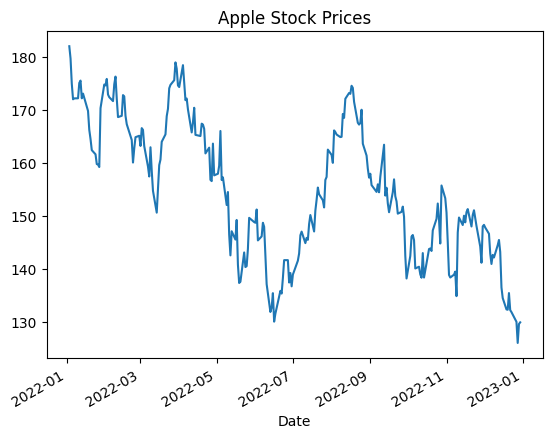

In [ ]:
#10.
import matplotlib.pyplot as plt

data = yf.download("AAPL", start="2022-01-01", end="2023-01-01")
data['Close'].plot()
plt.title("Apple Stock Prices")
plt.show()

# การดึงข้อมูลหุ้นด้วย datareader

In [ ]:
! pip install pandas-datareader

## Data readers กับข้อมูลใน FRED

In [ ]:
import pandas_datareader as pdr

#read 5-years of 10-year constant muturity yields on U.S. government bonds
#https://fred.stlouisfed.org/series/GS10
df_fred = pdr.get_data_fred('GS10')

In [ ]:
print(df_fred)

            GS10
DATE            
2019-10-01  1.71
2019-11-01  1.81
2019-12-01  1.86
2020-01-01  1.76
2020-02-01  1.50
2020-03-01  0.87
2020-04-01  0.66
2020-05-01  0.67
2020-06-01  0.73
2020-07-01  0.62
2020-08-01  0.65
2020-09-01  0.68
2020-10-01  0.79
2020-11-01  0.87
2020-12-01  0.93
2021-01-01  1.08
2021-02-01  1.26
2021-03-01  1.61
2021-04-01  1.64
2021-05-01  1.62
2021-06-01  1.52
2021-07-01  1.32
2021-08-01  1.28
2021-09-01  1.37
2021-10-01  1.58
2021-11-01  1.56
2021-12-01  1.47
2022-01-01  1.76
2022-02-01  1.93
2022-03-01  2.13
2022-04-01  2.75
2022-05-01  2.90
2022-06-01  3.14
2022-07-01  2.90
2022-08-01  2.90
2022-09-01  3.52
2022-10-01  3.98
2022-11-01  3.89
2022-12-01  3.62
2023-01-01  3.53
2023-02-01  3.75
2023-03-01  3.66
2023-04-01  3.46
2023-05-01  3.57
2023-06-01  3.75
2023-07-01  3.90
2023-08-01  4.17
2023-09-01  4.38
2023-10-01  4.80
2023-11-01  4.50
2023-12-01  4.02
2024-01-01  4.06
2024-02-01  4.21
2024-03-01  4.21
2024-04-01  4.54
2024-05-01  4.48
2024-06-01  4.

### Data readers กับข้อมูลใน web stooq

https://stooq.com/

In [ ]:
import pandas_datareader.data as web

df = web.get_data_stooq('^DJI')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2024-09-05 to 2019-09-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   float64
dtypes: float64(5)
memory usage: 58.9 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-05,41056.33,41084.78,40519.08,40755.75,324444930.0
2024-09-04,40872.06,41172.59,40840.89,40974.97,361074653.0
2024-09-03,41489.67,41489.67,40778.09,40936.93,415905399.0
2024-08-30,41366.16,41585.21,41145.85,41563.08,495459850.0
2024-08-29,41345.50,41577.97,41086.81,41335.05,314248774.0
...,...,...,...,...,...
2019-09-13,27216.67,27277.55,27193.95,27219.52,255350517.0
2019-09-12,27197.32,27306.73,27105.01,27182.45,249922811.0
2019-09-11,26928.05,27137.04,26885.48,27137.04,272683339.0


# **ตัวอย่างการดึงข้อมูลที่เป็น Time series**

In [ ]:
import yfinance as yf
import datetime as dt # ไลบรารีที่เราจะใช้สำหรับงานที่เกี่ยวข้องกับ วันเวลา
import pandas as pd # ไลบรารีที่เราจะใช้ทำงานเกี่ยวกับตาราง (Dataframe)

stock_name = "PTT.BK" # ใส่ชื่อของหุ้นที่เราจะดึงข้อมูล ในที่นี้คือ PTT
start_date = dt.date(2020,8,1) # กำหนดวันแรกที่จะดึงข้อมูล
end_date = dt.date(2022,8,30) # กำหนดวันสุดท้ายที่จะดึงข้อมูล
#ดึงข้อมูลมาเก็บไว้ในตัวแปร df
df = yf.download(stock_name, start_date, end_date)
df.to_csv("PTT.csv")# save ข้อมูลหุ้นเก็บไว้เป็นไฟล์ .csv

[*********************100%***********************]  1 of 1 completed


**แบบที่ 1**
ดึงข้อมูลจากไฟล์ .csv แล้วกำหนด index เป็น Date
เพื่อจัดการข้อมูลแบบ time series

In [ ]:
df = pd.read_csv('PTT.csv', parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,39.00,39.00,38.25,38.50,30.991520,35058600
2020-08-04,38.75,39.00,38.00,38.00,30.589031,60854500
2020-08-05,38.25,39.25,38.00,39.00,31.394009,61561600
2020-08-06,38.75,39.50,38.50,38.75,31.192768,34953700
2020-08-07,38.50,38.75,37.75,38.25,30.790281,59234200
...,...,...,...,...,...,...
2022-08-23,36.75,37.75,36.75,37.50,32.571442,47634400
2022-08-24,37.75,38.25,37.50,37.75,32.788586,96869700
2022-08-25,37.75,38.00,37.50,37.75,32.788586,42514900


**แบบที่ 2**

อ่านข้อมูลจากไฟล์ .csv แล้วกำหนด column Date เป็น index

In [ ]:
# ดึงข้อมูลหุ้นที่ save เก็บไว้มาไว้ในตัวแปร df1
df1 = pd.read_csv('PTT.csv')
# แปลง column Date ให้เป็นชนิดตัวแปร datetime (วันเวลา)
df1['Date']= pd.to_datetime(df1.Date)

In [ ]:
df1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-03,39.00,39.00,38.25,38.50,30.991520,35058600
1,2020-08-04,38.75,39.00,38.00,38.00,30.589031,60854500
2,2020-08-05,38.25,39.25,38.00,39.00,31.394009,61561600
3,2020-08-06,38.75,39.50,38.50,38.75,31.192768,34953700
4,2020-08-07,38.50,38.75,37.75,38.25,30.790281,59234200
5,2020-08-10,38.25,38.50,37.75,37.75,30.387789,23190400
6,2020-08-11,38.00,38.50,37.50,37.50,30.186550,61644200
7,2020-08-13,37.75,38.75,37.75,38.25,30.790281,61045300
8,2020-08-14,38.25,38.50,37.50,37.75,30.387789,38129200
9,2020-08-17,38.00,38.25,37.75,38.00,30.589031,20152300


In [ ]:
# เปลี่ยน column Date ให้เป็น index เพื่อที่จะใช้งานได้ง่ายๆ
df1 = df1.set_index('Date')

In [ ]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,39.00,39.00,38.25,38.50,30.991520,35058600
2020-08-04,38.75,39.00,38.00,38.00,30.589031,60854500
2020-08-05,38.25,39.25,38.00,39.00,31.394009,61561600
2020-08-06,38.75,39.50,38.50,38.75,31.192768,34953700
2020-08-07,38.50,38.75,37.75,38.25,30.790281,59234200
...,...,...,...,...,...,...
2022-08-23,36.75,37.75,36.75,37.50,32.571442,47634400
2022-08-24,37.75,38.25,37.50,37.75,32.788586,96869700
2022-08-25,37.75,38.00,37.50,37.75,32.788586,42514900


การ plot ข้อมูลตามช่วงเวลา

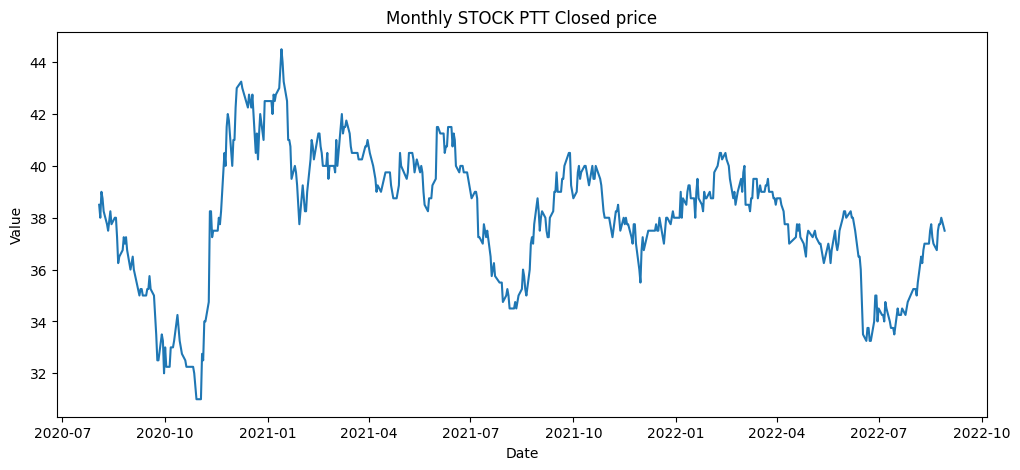

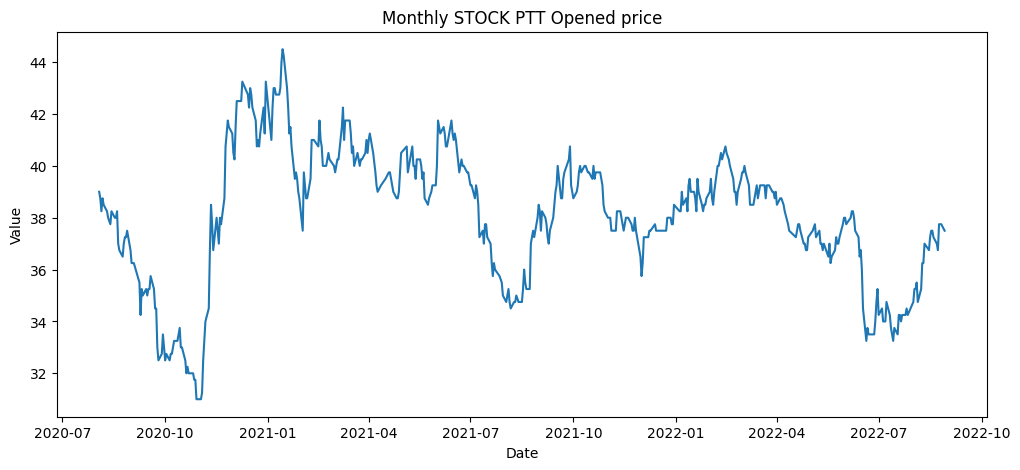

In [ ]:
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(12,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df1, x=df1.index, y=df1.Close, title='Monthly STOCK PTT Closed price')
plot_df(df1, x=df1.index, y=df1.Open, title='Monthly STOCK PTT Opened price')

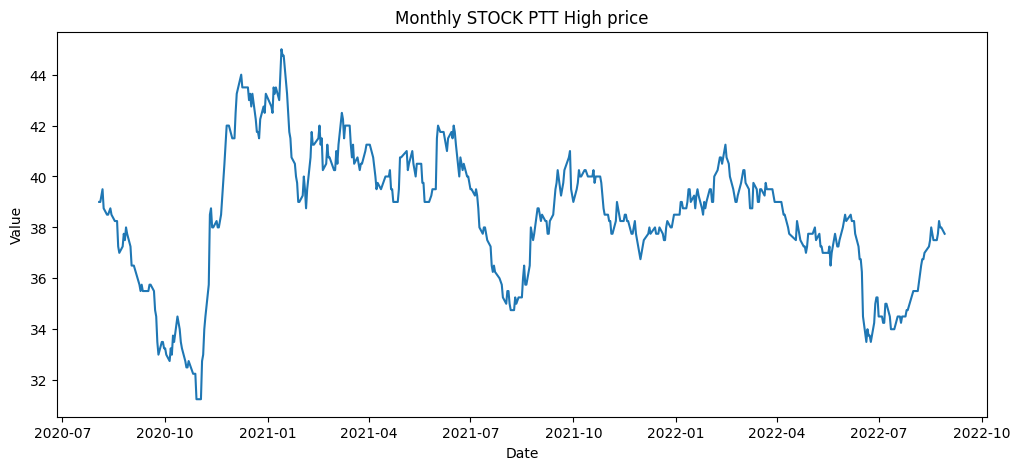

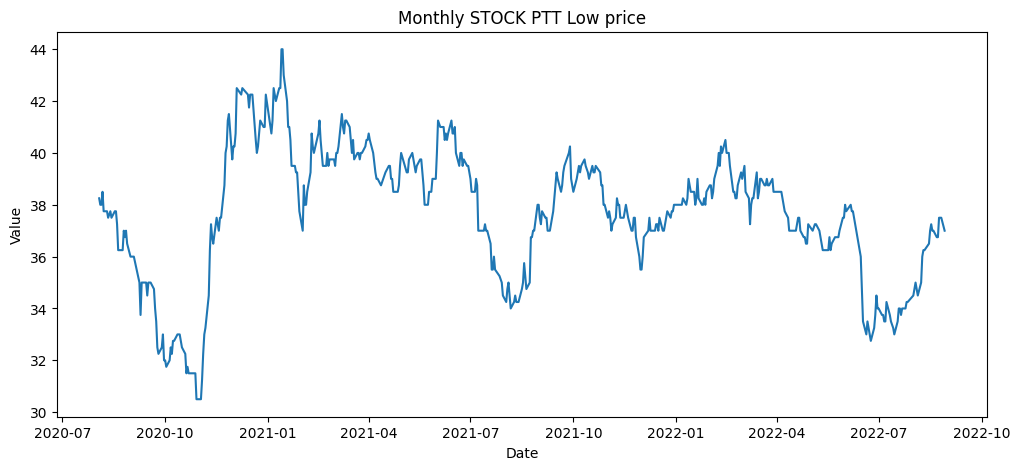

In [ ]:
plot_df(df1, x=df1.index, y=df1.High, title='Monthly STOCK PTT High price')
plot_df(df1, x=df1.index, y=df1.Low, title='Monthly STOCK PTT Low price')